# Simple Linear Regression #

### Treasury Bonds Holdins vs US Dollar Index ###

In [1]:
# Import Libraries

# Data Management
import pandas as pd
import numpy as np

# Statistics
import statsmodels.api as sm 
import matplotlib.pyplot as plt
from scipy.stats import t

# Get Data
from fredapi import Fred
import logging

# Pretty Notation
from IPython.display import display, Math

In [2]:
# Data Collection Function from FRED
def get_fred_data(symbol: str) -> pd.DataFrame:
    
    fred_key = '0174cb93931388a2bf305663e4117fd3'

    fred = Fred(api_key = fred_key)
    
    df = fred.get_series(symbol)
    
    return df

In [3]:
# Data for Y (Memorandum Items: Custody Holdings: Marketable U.S. Treasury Securities: Wednesday Level)
y = get_fred_data('WMTSECL1')

# Creating Time Index
y.index = pd.to_datetime(y.index)

print(y)

2002-12-18          0.0
2002-12-25          0.0
2003-01-01          0.0
2003-01-08          0.0
2003-01-15          0.0
                ...    
2025-02-19    2917590.0
2025-02-26    2926670.0
2025-03-05    2934671.0
2025-03-12    2928628.0
2025-03-19    2945911.0
Length: 1162, dtype: float64


In [4]:
# Data for Explanatory Variables (Nominal Broad U.S. Dollar Index)
x = get_fred_data('DTWEXBGS')

# Time Index
x.index = pd.to_datetime(x.index)

print(x)

2006-01-02    101.4155
2006-01-03    100.7558
2006-01-04    100.2288
2006-01-05    100.2992
2006-01-06    100.0241
                ...   
2025-03-17    125.6291
2025-03-18    125.7402
2025-03-19    126.0515
2025-03-20    126.2370
2025-03-21    126.5090
Length: 5015, dtype: float64


In [ ]:
# Create the Data for Lineal Regression
ols_df = pd.DataFrame({'x': x, 'y': y})

# Eliminate 0s
ols_df = ols_df[(ols_df['x'] > 0) & (ols_df['y'] > 0)]

# Cut the Sample
ols_df = ols_df["2018-01-01":]

ols_df

In [5]:
# We use Natural Log to calculate better betas
ols_df['y'] = np.log(y)
ols_df['x'] = np.log(x)

# Drop NaNs
ols_df = ols_df.dropna()

# Set Index as a Date Item
ols_df.index = pd.to_datetime(ols_df.index)

ols_df

C:\Users\edgar\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,x,y
2018-01-03,4.697522,14.918805
2018-01-10,4.697090,14.920003
2018-01-17,4.683543,14.920100
2018-01-24,4.673577,14.918578
2018-01-31,4.670672,14.924948
...,...,...
2025-02-19,4.851411,14.886268
2025-02-26,4.847930,14.889376
2025-03-05,4.842170,14.892106
2025-03-12,4.837274,14.890045


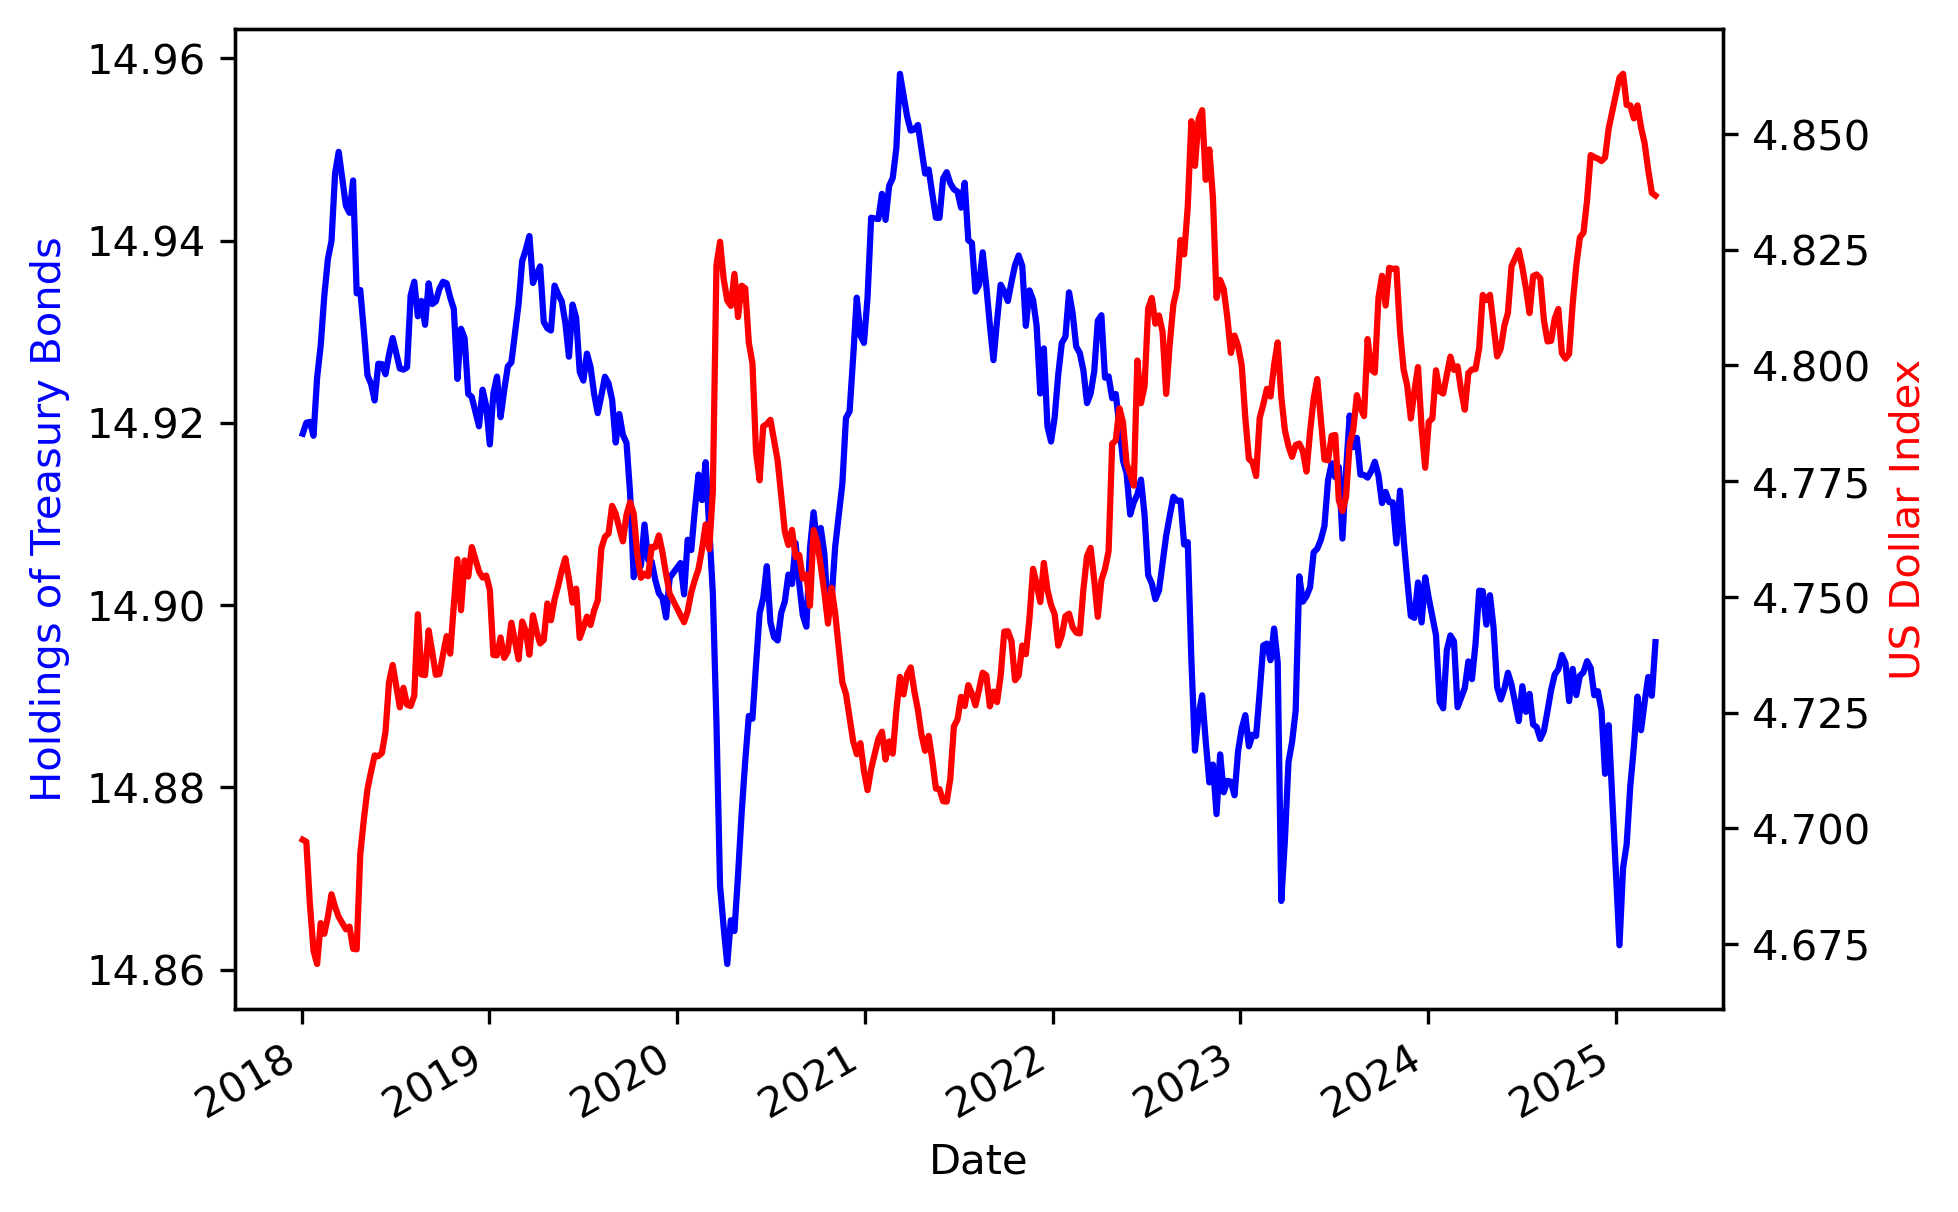

In [6]:
"""
By Plotting the Variables we might understand the relations among them
"""

# Create Figure
fig, ax1 = plt.subplots(dpi = 300)

# Holdings of Treasury Bonds Plot
ols_df['y'].plot(color = 'blue', ax = ax1)
ax1.set_xlabel('Date')
ax1.set_ylabel(
    'Holdings of Treasury Bonds', 
    color='blue'
    )

# US Dollar Index Plot
ax2 = ax1.twinx()

ols_df['x'].plot(color = 'red', ax = ax2)
ax2.set_ylabel(
    'US Dollar Index', 
    color='red'
    )

plt.show()

In [7]:
# Correlation Coefficient

display(Math(r"\rho=\frac{Cov(x,y)}{\sigma_x\sigma_y}"))

correlation = ols_df['y'].corr(ols_df['x'])

print(f"Pearson Correlation Coefficient: {correlation}")

<IPython.core.display.Math object>

Pearson Correlation Coefficient: -0.813410899427121


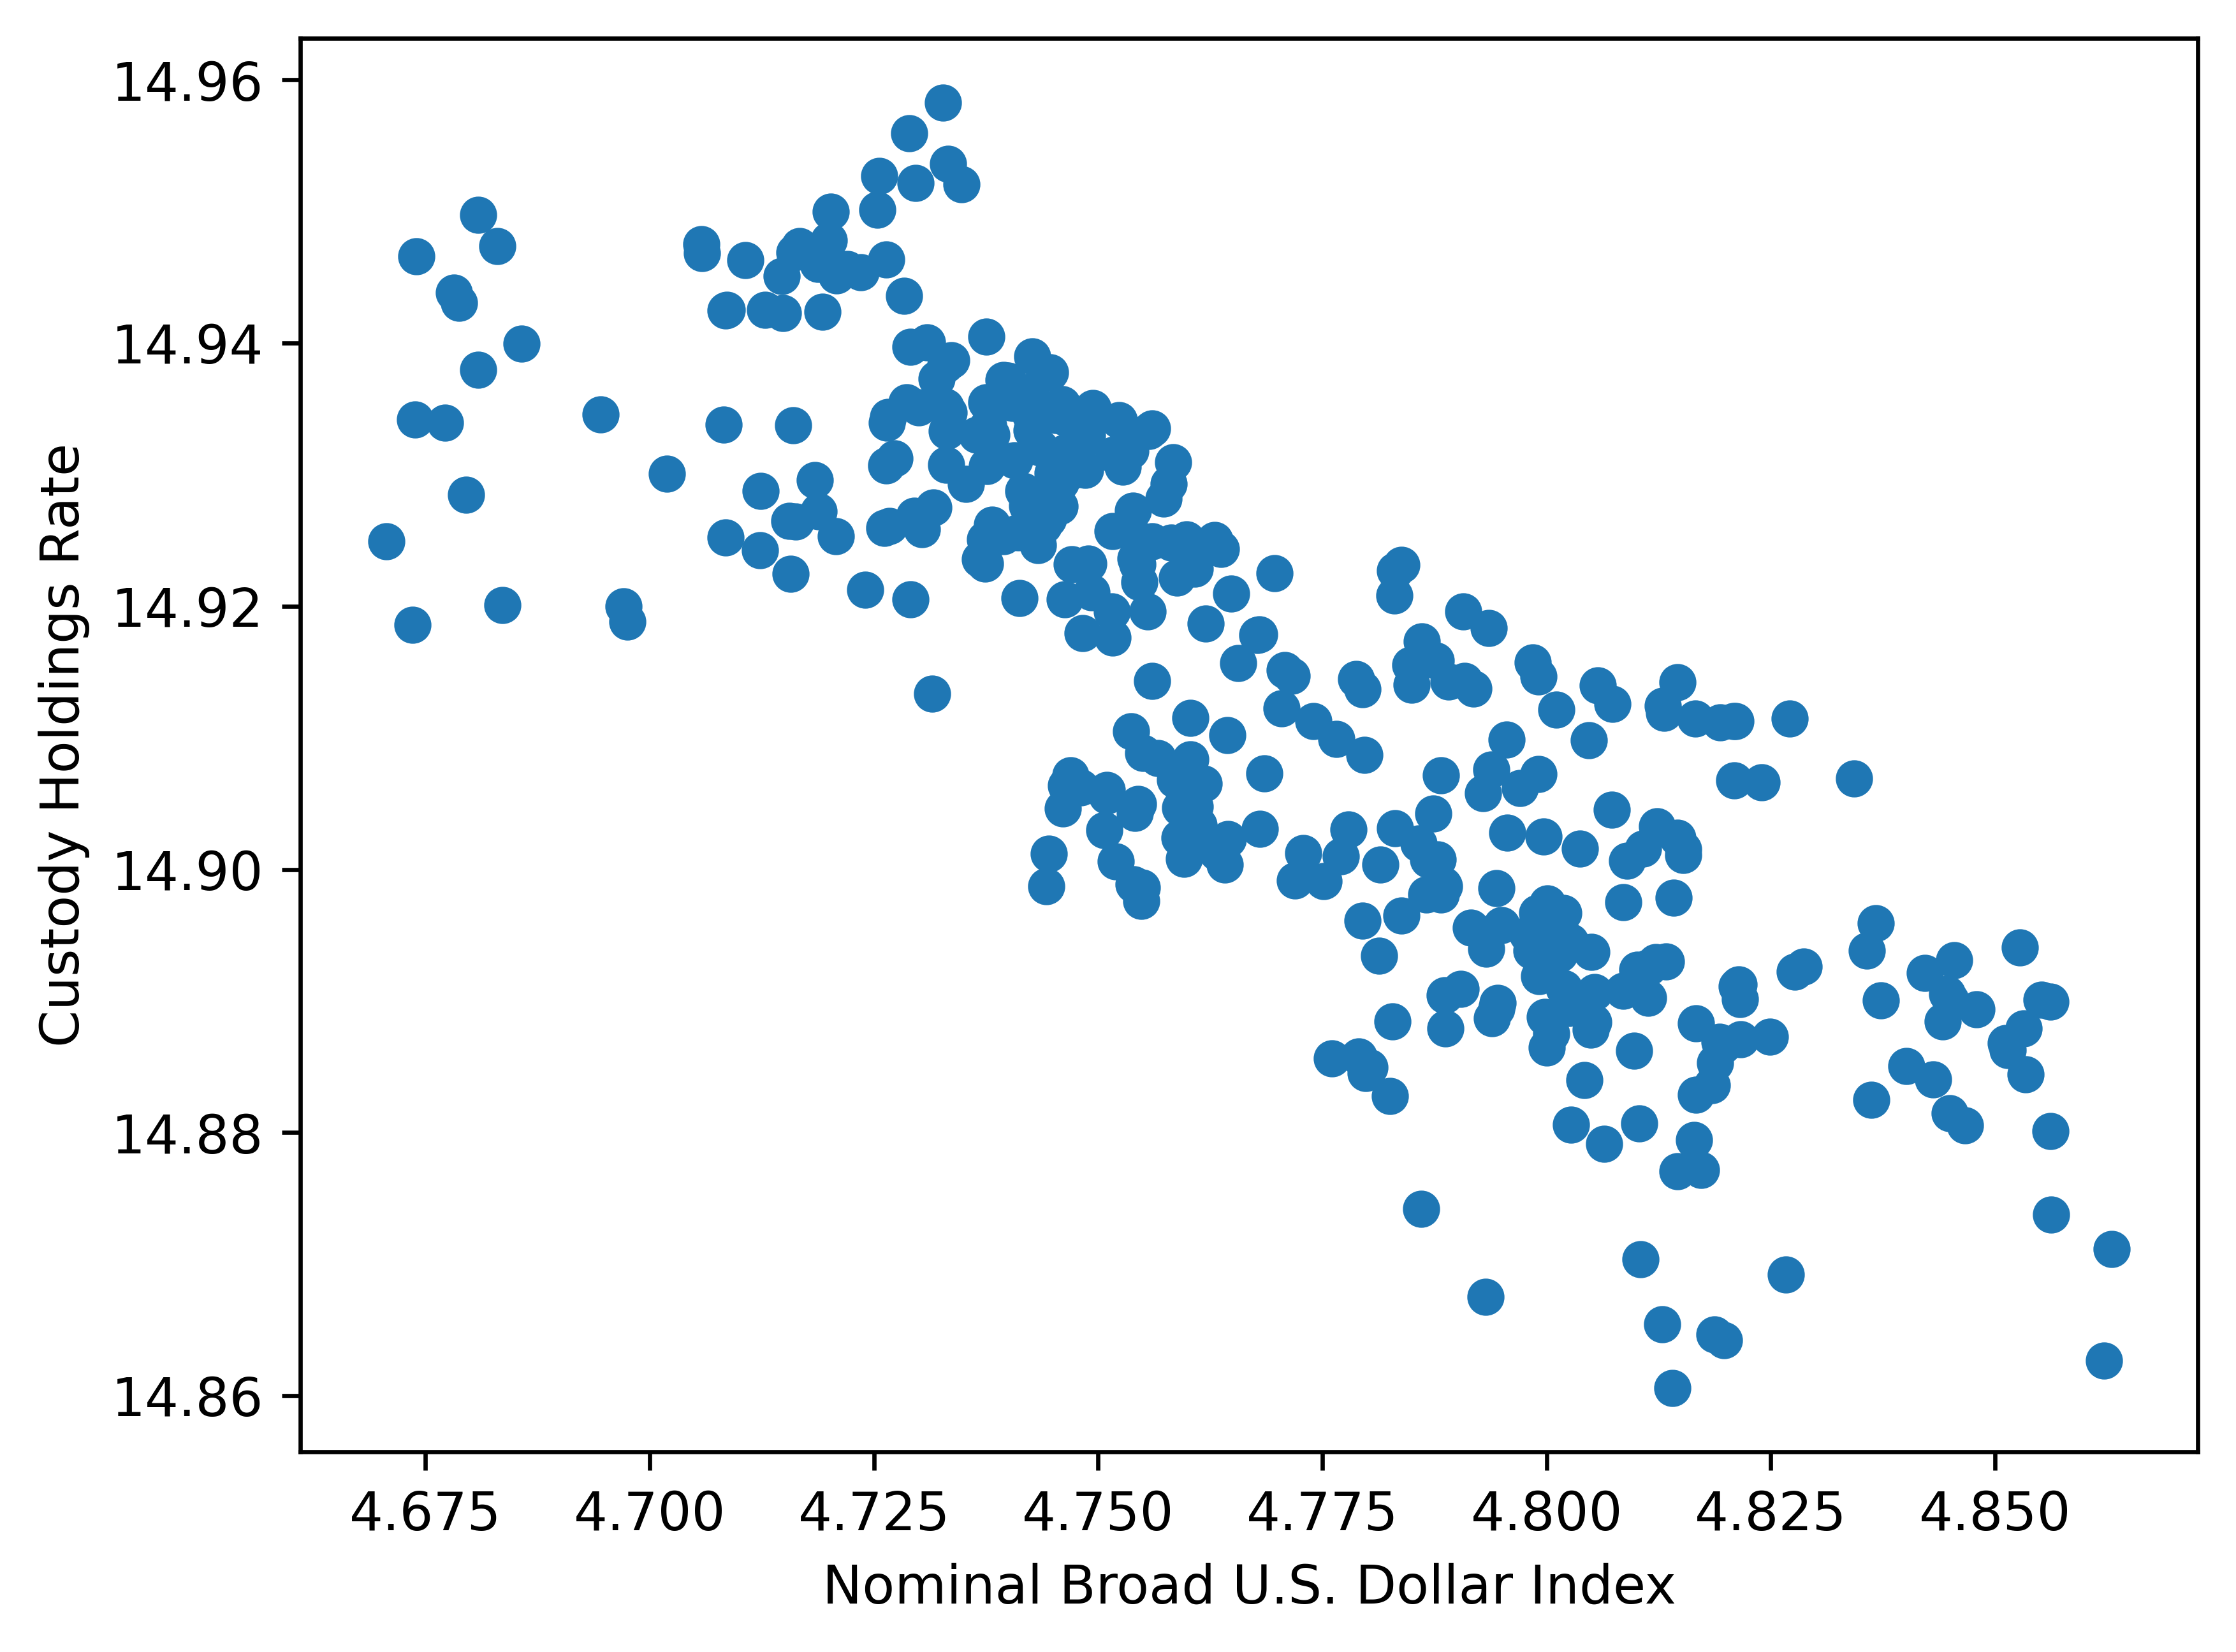

In [8]:
fig, ax1 = plt.subplots(dpi = 600)

plt.scatter(ols_df['x'], ols_df['y'])
plt.ylabel('Custody Holdings Rate')
plt.xlabel('Nominal Broad U.S. Dollar Index')

plt.show()

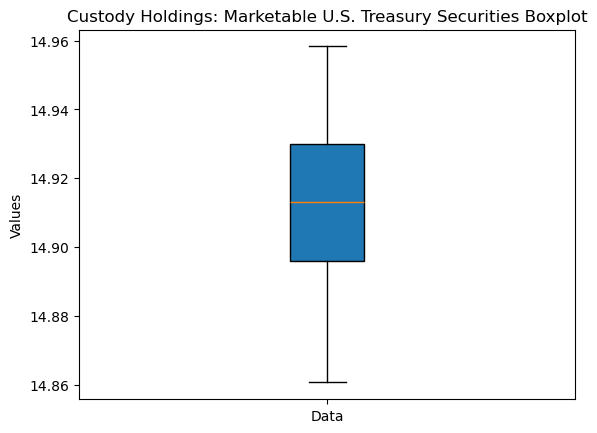

In [9]:
# Create a Box Plot to identify Outliers

plt.boxplot(ols_df['y'], vert=True, patch_artist=True)  

# Config
plt.title("Custody Holdings: Marketable U.S. Treasury Securities Boxplot")
plt.ylabel("Values")
plt.xticks([1], ["Data"]) 

plt.show()

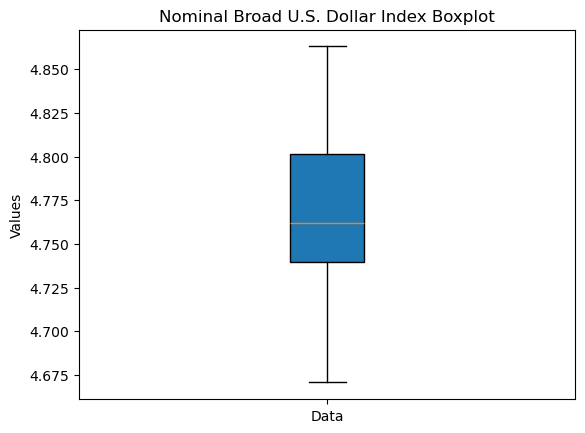

In [10]:
# Create a Box Plot to identify Outliers

plt.boxplot(ols_df['x'], vert=True, patch_artist=True)  

# Config
plt.title("Nominal Broad U.S. Dollar Index Boxplot")
plt.ylabel("Values")
plt.xticks([1], ["Data"]) 

plt.show()

In [11]:
# Let us eliminate those values on the Unemployment Rate Growth Rate that exceeds 3 Standard Deviations

inferior_limit = ols_df['y'].mean() - 3 * ols_df['y'].std()
superior_limit = ols_df['y'].mean() + 3 * ols_df['y'].std()

# Filtrar outliers
ols_df_filtered = ols_df[(ols_df["y"] >= inferior_limit) & (ols_df["y"] <= superior_limit)]

print(ols_df)

                   x          y
2018-01-03  4.697522  14.918805
2018-01-10  4.697090  14.920003
2018-01-17  4.683543  14.920100
2018-01-24  4.673577  14.918578
2018-01-31  4.670672  14.924948
...              ...        ...
2025-02-19  4.851411  14.886268
2025-02-26  4.847930  14.889376
2025-03-05  4.842170  14.892106
2025-03-12  4.837274  14.890045
2025-03-19  4.836691  14.895929

[366 rows x 2 columns]


In [12]:
"""
In a Linear Regression Model it is fundamental to have a Constant Value
This can be expressed as a Vertical Vector of 1's'
"""

ols_df_filtered['constant'] = 1

print(ols_df_filtered)

                   x          y  constant
2018-01-03  4.697522  14.918805         1
2018-01-10  4.697090  14.920003         1
2018-01-17  4.683543  14.920100         1
2018-01-24  4.673577  14.918578         1
2018-01-31  4.670672  14.924948         1
...              ...        ...       ...
2025-02-19  4.851411  14.886268         1
2025-02-26  4.847930  14.889376         1
2025-03-05  4.842170  14.892106         1
2025-03-12  4.837274  14.890045         1
2025-03-19  4.836691  14.895929         1

[366 rows x 3 columns]


In [13]:
# The Simple Linear Regression Model Equation

display(Math(r"y=\beta_0+\beta_1x+\varepsilon"))

<IPython.core.display.Math object>

In [14]:
display(Math(r"\hat{\beta_0}=\bar{y}-\hat{\beta_1}\bar{x}"))

display(Math(r"\hat{\beta_1}=\frac{\sum{xy}-\bar{x}\bar{y}}{\sum{x^2}-\bar{x}^2}=\frac{Cov(x,y)}{Var(x)}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [15]:
# Obtaining Variance and Covariance

covariance = ols_df_filtered['y'].cov(ols_df_filtered['x'])
variance = ols_df_filtered['x'].var()

print(f"Covariance: {covariance}")
print(f"Variance: {variance}")

Covariance: -0.0007052661225442464
Variance: 0.0017452944281719162


In [16]:
# Obtaining Slope Coefficient
slope = covariance/variance

print(slope)

-0.40409578530710566


In [17]:
# Obtaining Intercept Coefficient

intercept = ols_df_filtered['y'].mean() - slope*ols_df_filtered['x'].mean()

print(intercept)

16.83984337680745


In [18]:
# Obtaining Fitted Values and Residuals

ols_df_filtered['y_hat'] = intercept + slope*ols_df_filtered['x']
ols_df_filtered['residuals'] = ols_df_filtered['y'] - ols_df_filtered['y_hat']

print(ols_df_filtered)

                   x          y  constant      y_hat  residuals
2018-01-03  4.697522  14.918805         1  14.941594  -0.022790
2018-01-10  4.697090  14.920003         1  14.941769  -0.021766
2018-01-17  4.683543  14.920100         1  14.947243  -0.027144
2018-01-24  4.673577  14.918578         1  14.951271  -0.032692
2018-01-31  4.670672  14.924948         1  14.952444  -0.027496
...              ...        ...       ...        ...        ...
2025-02-19  4.851411  14.886268         1  14.879409   0.006860
2025-02-26  4.847930  14.889376         1  14.880815   0.008560
2025-03-05  4.842170  14.892106         1  14.883143   0.008963
2025-03-12  4.837274  14.890045         1  14.885121   0.004923
2025-03-19  4.836691  14.895929         1  14.885357   0.010572

[366 rows x 5 columns]


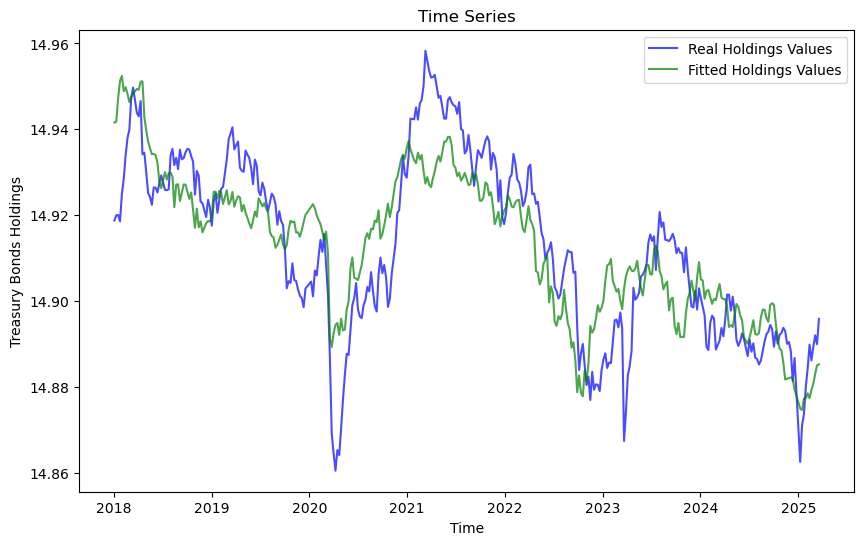

In [62]:
# Create Comparative Plot

# Crear el gráfico de la serie de tiempo y las medias móviles exponenciales
plt.figure(figsize=(10, 6))
plt.plot(ols_df_filtered['y'], label='Real Holdings Values', color='blue', alpha=0.7)
plt.plot(ols_df_filtered['y_hat'], label='Fitted Holdings Values', color='green', alpha=0.7)

# Añadir título y etiquetas
plt.title('Time Series')
plt.xlabel('Time')
plt.ylabel('Treasury Bonds Holdings')
plt.legend()

# Mostrar el gráfico
plt.show()

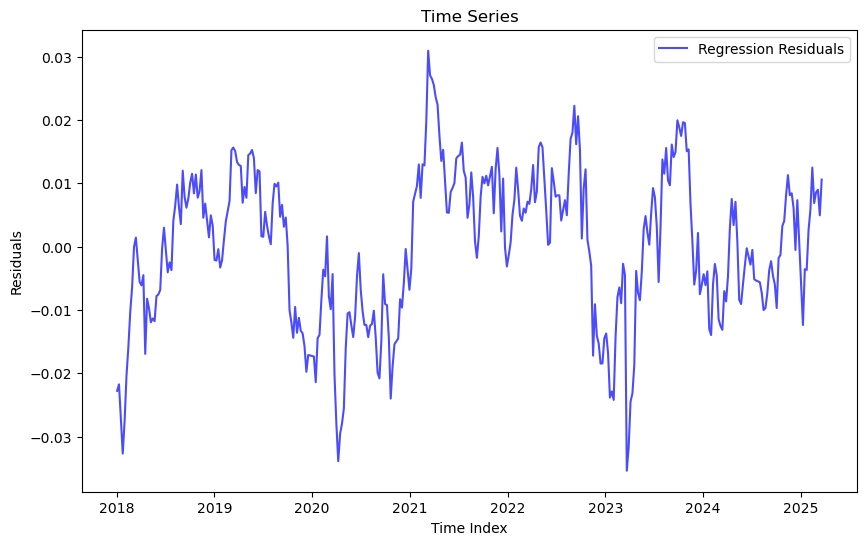

In [20]:
# Plot Residuals

# Crear el gráfico de la serie de tiempo y las medias móviles exponenciales
plt.figure(figsize=(10, 6))
plt.plot(ols_df_filtered['residuals'], label='Regression Residuals', color='red', alpha=0.7)

# Añadir título y etiquetas
plt.title('Time Series')
plt.xlabel('Time Index')
plt.ylabel('Residuals')
plt.legend()

# Mostrar el gráfico
plt.show()

In [21]:
# The Residuals Mean can give us information about the bias of the coefficients

print(f"Residuals Mean: {ols_df_filtered['residuals'].mean()}")

Residuals Mean: -2.2374330682063263e-15


In [22]:
# Obtain R-Squared

display(Math(r"R^2=\frac{Var(\hat{y})}{Var(y)}"))

print(f"Fitted Values Variance: {ols_df_filtered['y_hat'].var()}")
print(f"Real Values Variance: {ols_df_filtered['y'].var()}")

<IPython.core.display.Math object>

Fitted Values Variance: 0.00028499506764001275
Real Values Variance: 0.0004307421473736837


In [23]:
# Then the R-Squared Coefficient

r2 = ols_df_filtered['y_hat'].var()/ols_df_filtered['y'].var()

print(f"The R-Squared Coefficient is: {r2}")

The R-Squared Coefficient is: 0.661637291306833


In [24]:
# The Betas Standard Errors

display(Math(r"Var(\hat{\beta_0})=\sigma^2(\frac{1}{n}+\frac{\bar{x}^2}{(n-1)Var(x)})"))
display(Math(r"Var(\hat{\beta_1})=\frac{\sigma^2}{nVar(x)}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [25]:
# Let us calculate the Slope Standard Deviation

residuals_var = ols_df_filtered['residuals'].var(ddof=1)
x_var = ols_df_filtered['x'].var()
n = len(ols_df_filtered)

print(f"Residuals Variance: {residuals_var}")
print(f"Independent Variable Variance: {x_var}")

Residuals Variance: 0.00014574707973366948
Independent Variable Variance: 0.0017452944281719162


In [26]:
slope_std = np.sqrt(residuals_var)/np.sqrt(n*x_var)

print(f"Slope Coefficient Standard Deviation: {slope_std}")

Slope Coefficient Standard Deviation: 0.015105149816913925


In [27]:
intercept_var = residuals_var * (1/n + ols_df_filtered['x'].mean()**2 / ((n - 1) * x_var))
intercept_std = np.sqrt(intercept_var)

print(f"Intercept Coefficient Standard Deviation: {intercept_std}")

Intercept Coefficient Standard Deviation: 0.07213817831612716


In [28]:
# Create the t values

display(Math(r"t=\frac{\beta}{sse(\beta)}"))

<IPython.core.display.Math object>

In [29]:
# Calculate the t values

slope_t = slope/slope_std
intercept_t = intercept/intercept_std

if abs(slope_t) > 2:
    print(f"The t-value of {slope_t} shows evidence of statistical significance for the slope coefficient")
else:
    print(f"The t-value of {slope_t} shows no evidence of statistical significance for the slope coefficient")

if abs(intercept_t) > 2:
    print(f"The t-value of {intercept_t} shows evidence of statistical significance for the intercept coefficient")
else:
    print(f"The t-value of {intercept_t} shows no evidence of statistical significance for the intercept coefficient")

The t-value of -26.75218651950219 shows evidence of statistical significance for the slope coefficient
The t-value of 233.4387112329221 shows evidence of statistical significance for the intercept coefficient


In [30]:
#Model specification
model = sm.OLS(
    ols_df_filtered['y'], 
    sm.add_constant(ols_df_filtered['x'])
    )   
     
#the results of the model
results = model.fit() 
    
#The Parameters
Beta2 = results.params  

#here we check the summary
print(results.summary())       


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     711.8
Date:                Tue, 25 Mar 2025   Prob (F-statistic):           1.14e-87
Time:                        00:50:26   Log-Likelihood:                 1097.7
No. Observations:                 366   AIC:                            -2191.
Df Residuals:                     364   BIC:                            -2184.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8398      0.072    233.119      0.0